In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [6]:
# read data/nepal_bridges.csv as geopandas dataframe
bridges = gpd.read_file('data/nepal_bridges.csv')
bridges.head(1)
# bridges column names
bridges.columns

Index(['Bridge Number', 'Bridge Name', 'Bridge Type', 'Bridge Span(Mtrs)',
       'Trail Type', 'District', 'Major RM/UM', 'Ward No', 'River Name',
       'RM/UM Left', 'RM/UM Right', 'Latitude', 'Longitude',
       'Coordinate Source', 'National Agency', 'Foreign Agency',
       'Bridge Status', 'Action Taken', 'Mela Condition', 'Observerd by',
       'Observers Name', 'Completion FY', 'Bridge Warden Name and address',
       'Bridge Warden Contact No', 'Comment or Recommendation', 'Entered By',
       'Entered Date', 'Updated By', 'Updated Date', 'geometry'],
      dtype='object')

In [8]:
bridges.head(10)

,Bridge Number,Bridge Name,Bridge Type,Bridge Span(Mtrs),Trail Type,District,Major RM/UM,Ward No,River Name,RM/UM Left,...,Observers Name,Completion FY,Bridge Warden Name and address,Bridge Warden Contact No,Comment or Recommendation,Entered By,Entered Date,Updated By,Updated Date,geometry
0,01 5 002 18 06 01,Jogi Rumba,D,50,Local,Taplejung,Hangdewa,,Sobuwa khola,Hangdewa,...,NGO personnel,2005/06,bridge not visible,,,,,Om Khadka,17/08/2015,None
1,01 5 002 18 06 02,Dhupaure,ST,32,Local,Taplejung,Hangdewa,,Dhupaure Khola,Hangdewa,...,NGO personnel,1999/2000,bridge not visible,,,girman,,Satya N. Lohala,,None
2,01 5 003 18 06 04,Mauwa Khola,D,60.5,Main,Taplejung,Phuurumbu,,Mauwa Khola,Phuurumbu,...,NGO personnel,2004/05,bridge visible,,,girman,,Satya N. Lohala,,None
3,01 5 003 18 06 05,Gopani,D,50,Local,Taplejung,Phuurumbu,,Gopani Khola,Phurumbu,...,NGO personnel,2007/08,bridge not visible,,,girman,,Satya N. Lohala,,None
4,01 5 004 18 06 01,Thouwa,D,37,Local,Taplejung,Limkhim,,Sisne Khola,Phuurumbu,...,NGO personnel,1998/99,bridge not visible,,,girman,,Satya N. Lohala,,None
5,01 5 004 18 06 02,Sisne,D,56,Local,Taplejung,Limkhim,,Sisne Khola,Phuurumbu,...,NGO personnel,2004/05,bridge visible,,,girman,,Satya N. Lohala,,None
6,01 5 004 18 06 03,Tallo Sisne,D,84,Local,Taplejung,Limkhim,,Sisne Khola,Phuurumbu,...,NGO personnel,2006/07,bridge visible,,,girman,,Satya N. Lohala,,None
7,01 5 004 18 06 04,Tawa Linkhim,D,103,Local,Taplejung,Limkhim,,Tawa Khola,Limkhim,...,NGO personnel,2007/08,bridge not visible,,,girman,,Satya N. Lohala,,None
8,01 5 004 18 06 02,Hangbhurung,D,119,Main,Taplejung,Limkhim,,Tamor Nadi,Limkhim,...,NGO personnel,2010/11,bridge not visible,,,girman,,Satya N. Lohala,,None
9,01 5 005 18 06 01,Kali,D,29,Local,Taplejung,Dokhu,,Kali Khola,Dokhu,...,NGO personnel,1986/87,bridge visible,,,girman,,Satya N. Lohala,,None


In [10]:
# create a new column that is completion fy digits up until / character
bridges['Completion Year'] = bridges['Completion FY'].str.split('/').str[0]
bridges

,Bridge Number,Bridge Name,Bridge Type,Bridge Span(Mtrs),Trail Type,District,Major RM/UM,Ward No,River Name,RM/UM Left,...,Completion FY,Bridge Warden Name and address,Bridge Warden Contact No,Comment or Recommendation,Entered By,Entered Date,Updated By,Updated Date,geometry,Completion Year
0,01 5 002 18 06 01,Jogi Rumba,D,50,Local,Taplejung,Hangdewa,,Sobuwa khola,Hangdewa,...,2005/06,bridge not visible,,,,,Om Khadka,17/08/2015,None,2005
1,01 5 002 18 06 02,Dhupaure,ST,32,Local,Taplejung,Hangdewa,,Dhupaure Khola,Hangdewa,...,1999/2000,bridge not visible,,,girman,,Satya N. Lohala,,None,1999
2,01 5 003 18 06 04,Mauwa Khola,D,60.5,Main,Taplejung,Phuurumbu,,Mauwa Khola,Phuurumbu,...,2004/05,bridge visible,,,girman,,Satya N. Lohala,,None,2004
3,01 5 003 18 06 05,Gopani,D,50,Local,Taplejung,Phuurumbu,,Gopani Khola,Phurumbu,...,2007/08,bridge not visible,,,girman,,Satya N. Lohala,,None,2007
4,01 5 004 18 06 01,Thouwa,D,37,Local,Taplejung,Limkhim,,Sisne Khola,Phuurumbu,...,1998/99,bridge not visible,,,girman,,Satya N. Lohala,,None,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8718,31 5 019 18 06 04,Damrang Gaibang,D,119,Local,Makawanpur,Raksirang,1,Sankar Khola,,...,2021/2022,,,,,,Rajiv Kr. Thapa,2022-08-25,None,2021
8719,07 5 0744 18 06 05,,dw,,,Bajhang,Chabispathivera Ga Pa,,,,...,,,,,,,,,None,
8720,07 5 0744 18 06 06,sagarkhet steel truss,dw,,,Bajhang,Chabispathivera Ga Pa,,,,...,,,,,,,,,None,
8721,03 5 0667 18 06 13,Ramati Kagate,D,114.25,Main,Nuwakot,Dupcheshwar Ga Pa,6,Tadi Khola,,...,,Pahalman Tamang/Dupcheshor-6,,,,,SNC,20 Sep 2022,None,


In [14]:
# try to convert Completion Year to date type year
bridges['Completion Year'] = pd.to_datetime(bridges['Completion Year'], format='%Y', errors='coerce')

<AxesSubplot: title={'center': 'Bridges by Completion Year'}>

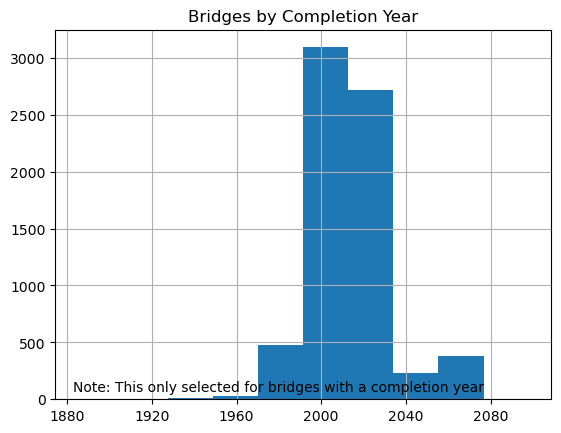

In [26]:
# create dataframe with only bridges that have a completion year
bridges_with_year = bridges[bridges['Completion Year'].notnull()]
# plot histogram of completion year
histogram_completion = bridges_with_year['Completion Year'].hist()
histogram_completion.set_title('Bridges by Completion Year')
# add note to graph
histogram_completion.text(0.4, 0.0, 'Note: This only selected for bridges with a completion year', horizontalalignment='center', verticalalignment='top', transform=x.transAxes)
histogram_completion

In [39]:
# remove rows that are before 1960 or after 2022 in bridges_with_year
bridges_with_year = bridges_with_year[(bridges_with_year['Completion Year'] > '1960-01-01') & (bridges_with_year['Completion Year'] < '2022-01-01')]

/opt/homebrew/Caskroom/miniforge/base/envs/html5lib/lib/python3.9/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


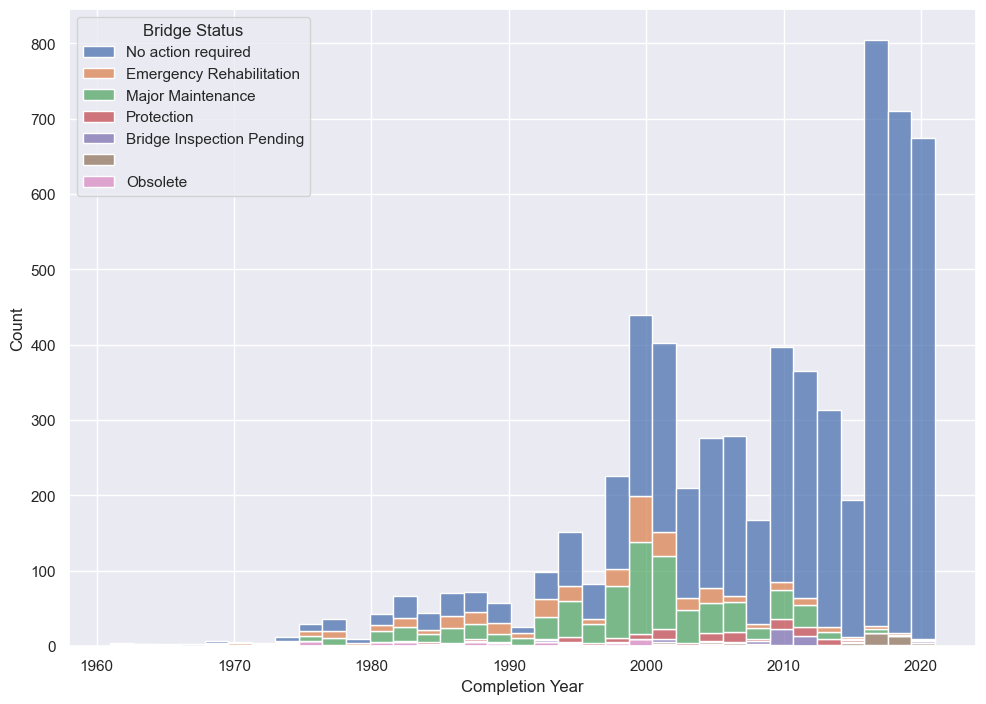

In [41]:

histogram_completion_status = sns.histplot(data=bridges_with_year, x='Completion Year', hue='Bridge Status', multiple='stack')